# HNCDI Explain: Grover Tutorial 3

This is tutorial 3 on Grover's Algorithm. This is a 5-qubit example, with varying Grover iterations. The notebook performs two Grover circuits: the first circuit with 1-iteration and the second with $k'$-iterations.

The code below will do the following. We will first select the maximum number of grover iterations determined by the parameter $k$, where $k-1 = k'$. We will then select a number from a list and then create the corresponding bit-string for the good item. We will import Qiskits existing algorithm that implements Grovers algorithm. We will then run Grover's algorithm for 1-iteration and $k'$-iterations and compare the probability that the marked item was found.

__Task__. In cell 2 below, modify the parameter $k$. How does this change the probability that the marked item is found?


In [24]:
import numpy as np
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.quantum_info import Statevector
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as real_sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile


Define the parameter $k$ that determines the maximum number of Grover iterations.

__Task.__ In the cell below, modify the integer parameter $k$. For example, start with $k$ is $4$ and subsequently increase.

In [25]:
### Modify Parameter k here ###

k = 6

###

print({'The maximum number of Grover iterations is': k-1})

{'The maximum number of Grover iterations is': 5}


We will now step through Grover's algorithm, where we will be able to choose the marked item. First, we create a list of numbers from $0$ to $2^n - 1$, where $n$ is the number of qubits. 

In [26]:
# number of qubits is 5
n = 5
myList = list(range(0, (2**n)))
print(myList)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


From this list, choose a number that will correspond to the good marked item. We will convert this to a bit-string. 

Note that this cell also allows you to randomly generate the good marked item. As default, it is set to $31$, the last item on the list.

In [27]:
# Here we can enter the good item or randomly generate it
secret = 31
#secret = random.randint(0, 2**n -1)  

secret_string = format(secret, "04b")  # format the owner in bit string

print({'The secret number is ': secret})
print({'And the corresponding secret string is ': secret_string})

{'The secret number is ': 31}
{'And the corresponding secret string is ': '11111'}


We will now create the state vector corresponding to the selected bit-string.

In [28]:
# Create state vector corresponding to the selected string 
oracle = Statevector.from_label(secret_string)  
print('This is the corresponding state for the marked item:')
oracle.draw(output='latex')

This is the corresponding state for the marked item:


<IPython.core.display.Latex object>

We will now import and use the existing Qiskit algorithms that perform Grover's circuit.

In [29]:
# from qiskit.algorithms import AmplificationProblem
# from qiskit.algorithms import Grover
from qiskit_algorithms.amplitude_amplifiers.amplification_problem import AmplificationProblem
from qiskit_algorithms.amplitude_amplifiers.grover import Grover

problem = AmplificationProblem(oracle, is_good_state=secret_string)

#define several grover circuits for different no. of iterations
grover_circuits = []

print({'Thew maximum number of Grover iterations is': (k-1)})
#Construct Grover circuits for different k
for iteration in range(1, k):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

{'Thew maximum number of Grover iterations is': 5}


We will first submit the grover circuit with 1 iteration to a simulator. 

In [30]:
# Grover's circuit with 1 iteration
print({'This is the Grover circuit with number of iterations =': (1)})
qc1 = grover_circuits[0]
qc1.draw()

{'This is the Grover circuit with number of iterations =': 1}


┌───┐┌────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0   ├─░─┤M├────────────
        ├───┤│    │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1   ├─░──╫─┤M├─────────
        ├───┤│    │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Q ├─░──╫──╫─┤M├──────
        ├───┤│    │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3   ├─░──╫──╫──╫─┤M├───
        ├───┤│    │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4   ├─░──╫──╫──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═══════════════╩══╩══╩══╩══╩═
                       0  1  2  3  4

{'Recall the good marked item is': '11111'}


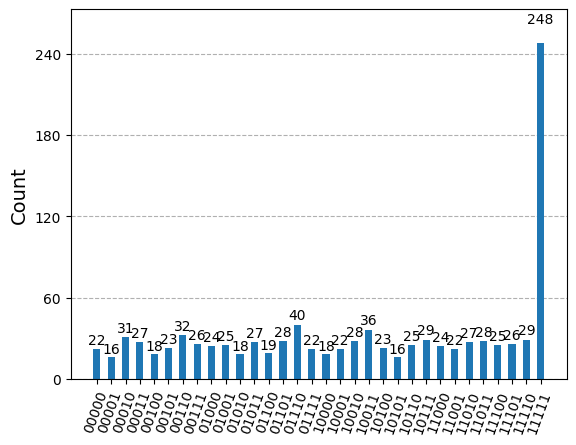

In [31]:
print({'Recall the good marked item is': secret_string})

sim = AerSimulator()
sampler = SamplerV2()
t_circ = transpile(qc1, sim, optimization_level=3)
results = sampler.run([t_circ], shots=1024).result()
answer = results[0].data.meas.get_counts()
plot_histogram(answer)

We will now submit the grover circuit with $k$ iterations to a simulator. 

In [32]:
# Grover's circuit with max number of iterations
print({'This is the Grover circuit with number of iterations =': (k-1)})
qcm = grover_circuits[k-2]
qcm.draw()

{'This is the Grover circuit with number of iterations =': 5}


┌───┐┌────┐┌────┐┌────┐┌────┐┌────┐ ░ ┌─┐            
   q_0: ┤ H ├┤0   ├┤0   ├┤0   ├┤0   ├┤0   ├─░─┤M├────────────
        ├───┤│    ││    ││    ││    ││    │ ░ └╥┘┌─┐         
   q_1: ┤ H ├┤1   ├┤1   ├┤1   ├┤1   ├┤1   ├─░──╫─┤M├─────────
        ├───┤│    ││    ││    ││    ││    │ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├┤2 Q ├┤2 Q ├┤2 Q ├┤2 Q ├┤2 Q ├─░──╫──╫─┤M├──────
        ├───┤│    ││    ││    ││    ││    │ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├┤3   ├┤3   ├┤3   ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├───
        ├───┤│    ││    ││    ││    ││    │ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├┤4   ├┤4   ├┤4   ├┤4   ├┤4   ├─░──╫──╫──╫──╫─┤M├
        └───┘└────┘└────┘└────┘└────┘└────┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═══════════════════════════════════════╩══╩══╩══╩══╩═
                                               0  1  2  3  4

{'Recall the good marked item is': '11111'}


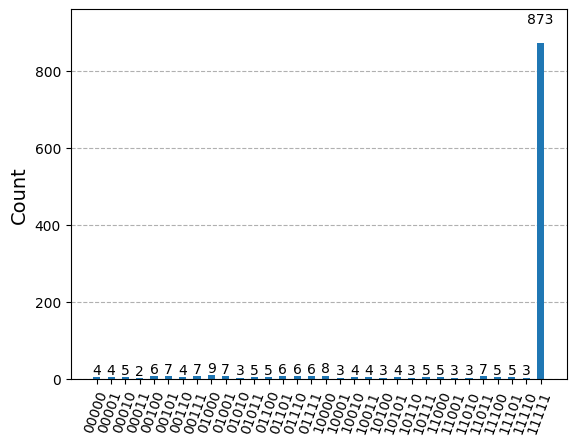

In [33]:
print({'Recall the good marked item is': secret_string})

sim = AerSimulator()
sampler = SamplerV2()
t_circ = transpile(qcm, sim, optimization_level=3)
results = sampler.run([t_circ], shots=1024).result()
answer = results[0].data.meas.get_counts()
plot_histogram(answer)

Compare this now to the Grover Circuit with 1-iteration. Has the marked item been found with high probability? How does the number of Grover circuits affect the probability that the marked good item was found? 

### Homework: Use online resources to run on Quantum Hardware

https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

Create an account and submit this job to real quantum hardware (more difficult). You have 10 minutes of free compute time a month on the Open plan.

In [14]:
#Can compare to real quantum hardware
# circ = qcm

# from qiskit import execute
# from qiskit.providers.ibmq import least_busy
# provider = IBMQ.load_account() 
# device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
# job = execute(circ, backend = device, shots =1024, optimization_level = 3)
# from qiskit.tools.monitor import job_monitor
# job_monitor(job, interval = 2)
# results = job.result()
# answer = results.get_counts(circ)
# plot_histogram(answer)